## Importujeme potrebné balíky

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
import seaborn as sns
sns.set()

## Import dát a čistenie dát

In [2]:
raw_csv_data = pd.read_csv("Index2022.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse # definovaná premenná

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8) # vytiahne prvých 80% záznamov
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:] # nastaví veľkosti vzoriek

In [5]:
import warnings # nezobrazuje chybové hlášky
warnings.filterwarnings("ignore")

##  LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## ADF test market_value

(-1.9041551418836873,
 0.330108932770283,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

## Vytvorenie výnosov - returns

## ADF test výnosov

In [7]:
# Adfuller test

In [8]:
# ACF FTSE výnosov

In [9]:
# PACF FTSE výnosov

## ARMA(1,0)

## ARMA(7,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sun, 24 Apr 2022   AIC                          15791.294
Time:                        11:05:51   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.returns    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.returns     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.returns    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.returns    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.returns     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2269           -0.0000j            5.2269           -0.0000
-----------------------------------------------------------------------------
"""

In [14]:

#porovnanie ARMA(6,0) a ARMA(7,0)


LLR test p-value = 0.44


,market_value,returns,wn
count,5020.000000,5020.000000,5020.000000
mean,5089.968287,0.018762,5096.648818
std,1016.947075,1.174752,1011.964781
min,2876.600000,-8.849274,1463.241422
25%,4275.360000,-0.543558,4409.230514
50%,5266.235000,0.005684,5074.154767
75%,5917.732500,0.607534,5764.884425
max,6930.200000,9.838771,8516.349938


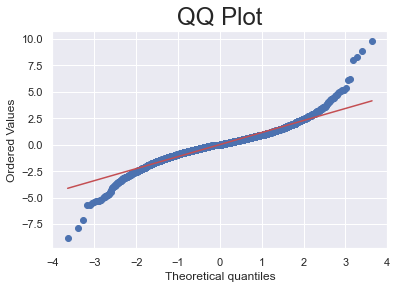

In [59]:
import scipy.stats
import pylab
#keby potrebujem QQ plot

## ARMA(0,1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sat, 23 Apr 2022   AIC                          15865.190
Time:                        15:35:49   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8549           +0.0000j           38.8549            0.0000
-----------------------------------------------------------------------------
"""

## ARMA(0,7)

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sat, 23 Apr 2022   AIC                          15796.091
Time:                        15:35:52   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     -3.454      0.001      -0.077      -0.021
ma.L3.returns    -0.0821      0.014     -5.789      0.000      -0.110      -0.054
ma.L4.returns     0.0458      0.014      3.360      0.001       0.019       0.073
ma.L5.returns    -0.0486      0.014     -3.381      0.001      -0.077      -0.020
ma.L6.returns    -0.0390      0.014     -2.702      0.007      -0.067      -0.011
ma.L7.returns     0.0085      0.014      0.592      0.554      -0.020       0.037
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.9690           -1.1814j            1.5279           -0.3593
MA.2           -0.9690           +1.1814j            1.5279            0.3593
MA.3           -2.0397           -0.0000j            2.0397           -0.5000
MA.4            0.7516           -1.5246j            1.6998           -0.1771
MA.5            0.7516           +1.5246j            1.6998            0.1771
MA.6            1.5538           -0.0000j            1.5538           -0.0000
MA.7            5.5175           -0.0000j            5.5175           -0.0000
-----------------------------------------------------------------------------
"""

In [62]:
#porovnanie ARMA(0,6) a ARMA(0,7)


LLR test p-value = 0.554


## ARMA(1,1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(1, 1)   Log Likelihood               -7915.406
Method:                       css-mle   S.D. of innovations              1.171
Date:                Sat, 23 Apr 2022   AIC                          15838.812
Time:                        15:35:56   BIC                          15864.896
Sample:                    01-11-1994   HQIC                         15847.952
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.448      0.148      -0.007       0.045
ar.L1.returns     0.7647      0.067     11.338      0.000       0.633       0.897
ma.L1.returns    -0.8139      0.061    -13.393      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3077           +0.0000j            1.3077            0.0000
MA.1            1.2286           +0.0000j            1.2286            0.0000
-----------------------------------------------------------------------------
"""

## ARMA model v porovnaní s AR(1) / MA(1)

In [10]:
# modely AR(1) a MA(1)

In [65]:
print("\nARMA vs AR ", LLR_test(model_ret_ar_1, model_ret_ar_1_ma_1))
print("\nARMA vs MA ", LLR_test(model_ret_ma_1, model_ret_ar_1_ma_1))
# porovnanie


ARMA vs AR  0.0

ARMA vs MA  0.0


## ARMA Model vyššieho rádu

In [30]:
#ARMA(3,3)

In [32]:
#summarizácia

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(3, 3)   Log Likelihood               -7892.414
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 22 Apr 2022   AIC                          15800.828
Time:                        19:33:27   BIC                          15852.996
Sample:                    01-11-1994   HQIC                         15819.109
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.398      0.162      -0.008       0.046
ar.L1.returns    -0.1903      0.104     -1.828      0.068      -0.394       0.014
ar.L2.returns    -0.2944      0.087     -3.386      0.001      -0.465      -0.124
ar.L3.returns     0.4450      0.139      3.210      0.001       0.173       0.717
ma.L1.returns     0.1712      0.099      1.726      0.084      -0.023       0.366
ma.L2.returns     0.2279      0.084      2.698      0.007       0.062       0.393
ma.L3.returns    -0.5424      0.128     -4.253      0.000      -0.792      -0.292
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5170           -1.0286j            1.1512           -0.3241
AR.2           -0.5170           +1.0286j            1.1512            0.3241
AR.3            1.6955           -0.0000j            1.6955           -0.0000
MA.1           -0.5289           -0.9838j            1.1169           -0.3285
MA.2           -0.5289           +0.9838j            1.1169            0.3285
MA.3            1.4779           -0.0000j            1.4779           -0.0000
-----------------------------------------------------------------------------
"""

## Reziduály výnosov

In [38]:
df['res_ret_ar_1_ma_1'] = results_ret_ar_1_ma_1.resid[1:]

In [11]:
# Reziduály výnosov - graficky

In [12]:
# ACF reziduálov výnosov

## ARMA Model cien

In [14]:
# ACF cien

In [13]:
# PACF cien

In [ ]:
# ARMA(1,1) cien